<a href="https://colab.research.google.com/github/raghuln26/ml-classification-project/blob/main/11805979_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#IMPORTING THE LIB

# New Section

In [43]:
#importing the required lib
import pandas as pd          #------------------------------------------>Used to load the dataset
import numpy as np           #------------------------------------------>Used for performing mathematical and logical operations 
import matplotlib.pyplot as plt  #-------------------------------------->This lib is used for Visualization
import seaborn as sns         #----------------------------------------->Import the Seaborn module
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix #------------------------>Importing the 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier  #------->Importing the classification model and boosting model for improving the performane.
from sklearn.linear_model import LogisticRegression                          #----------------------------->Importing the multi class classification model logisitic regression
from sklearn.neighbors import KNeighborsClassifier   #----------------------------------------------------->Importing the knn classifier

In [44]:
data = pd.read_csv("/content/winequalityN.csv")    #----------> loading the dataset using pandas
data.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [46]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

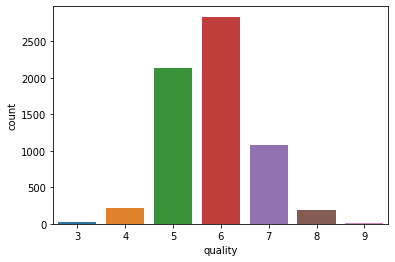

In [47]:
import seaborn as sns
sns.countplot(x ='quality', data = data)

In [48]:
data.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

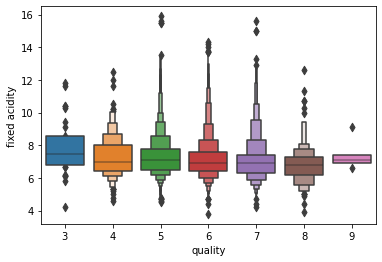

In [49]:
sns.boxenplot(x="quality", y="fixed acidity", 
                   data=data)

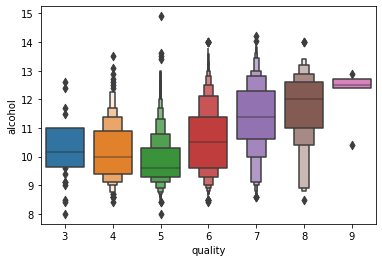

In [50]:
sns.boxenplot(x="quality", y="alcohol",
                   data=data)

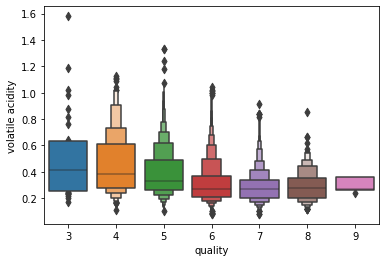

In [51]:
sns.boxenplot(x="quality", y="volatile acidity", 
                   data=data)

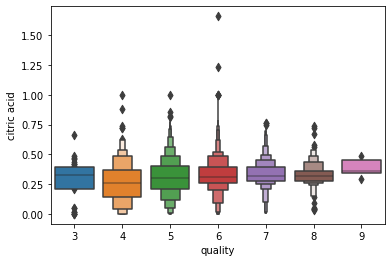

In [52]:
sns.boxenplot(x="quality", y="citric acid",
                   data=data)

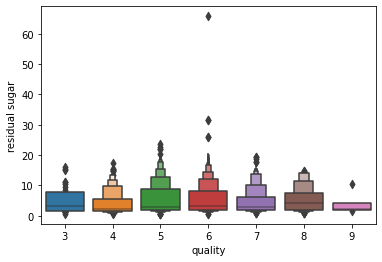

In [53]:
sns.boxenplot(x="quality", y="residual sugar",
                   data=data)

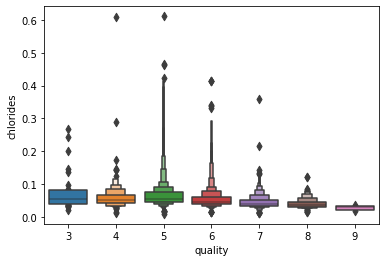

In [54]:
sns.boxenplot(x="quality", y="chlorides", 
                   data=data)

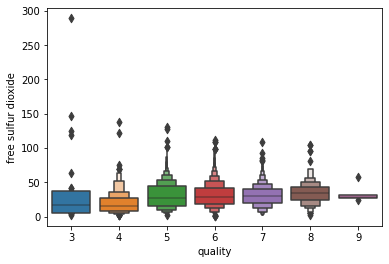

In [55]:
sns.boxenplot(x="quality", y="free sulfur dioxide", 
                   data=data)

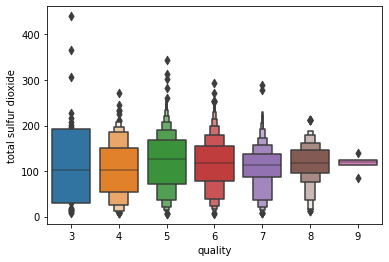

In [56]:
sns.boxenplot(x="quality", y="total sulfur dioxide",
                   data=data)

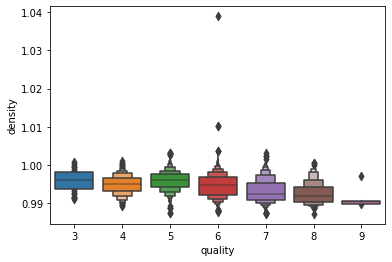

In [57]:
sns.boxenplot(x="quality", y="density",
                   data=data)

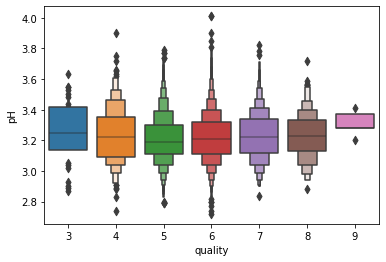

In [58]:
sns.boxenplot(x="quality", y="pH",
                   data=data)

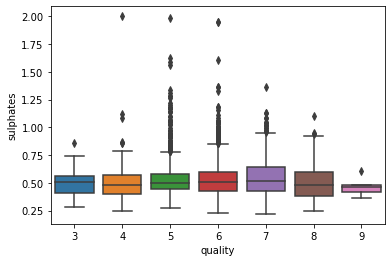

In [59]:
sns.boxplot(x="quality", y="sulphates",
                   data=data)

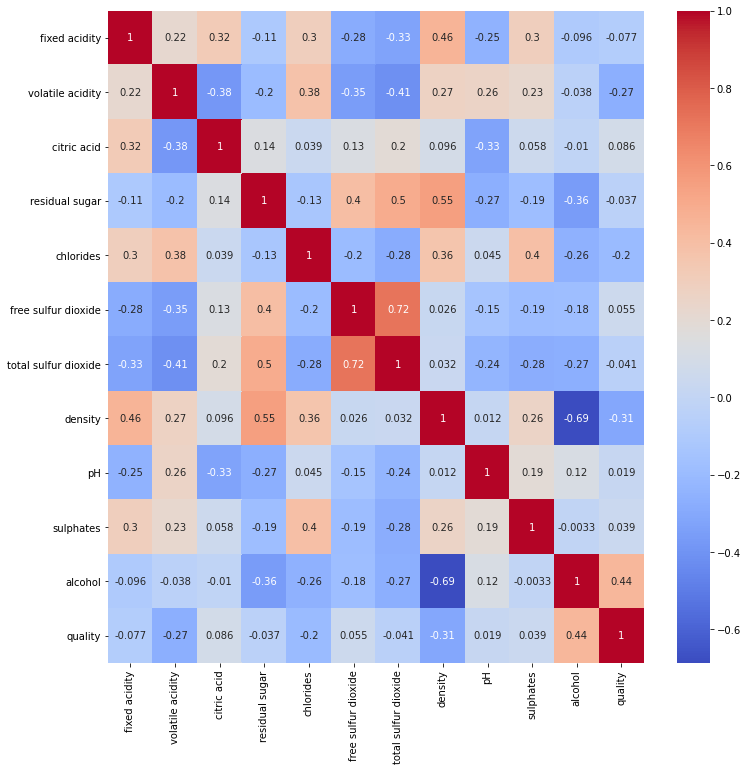

In [60]:
plt.figure(figsize=(12,12))
cor = data.corr(method='pearson')
sns.heatmap(cor,annot=True,cmap=plt.cm.coolwarm)
plt.show()

In [61]:
data_data = []
for x in data.quality:
  if x<=5:
     data_data.append(0)
  else:
     data_data.append(1)

In [62]:
data['target'] = data_data


In [63]:
data.tail(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6,1
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,1


In [64]:
data['target'].value_counts()

1    4113
0    2384
Name: target, dtype: int64

In [65]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(data.iloc[ :, 1:11])
data.iloc[ :, 1:11] = imputer.transform(data.iloc[ :, 1:11])

In [66]:
train_data = pd.DataFrame(data=data)

In [67]:
train_data.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [68]:
train_data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
target                  0
dtype: int64

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
train_data= np.array(ct.fit_transform(train_data))

In [70]:
train_data1 = pd.DataFrame(data=train_data)

In [71]:
train_data1.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,1.0
1,0.0,1.0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,1.0
2,0.0,1.0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,1.0
3,0.0,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,1.0
4,0.0,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,1.0


In [72]:
x= train_data1.iloc[:, :-2].values       #------------>list of feature
y = train_data1.iloc[:, -1].values       #----------------->list of label

In [73]:
X = pd.DataFrame(data = x)

In [74]:
X.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,0.0,1.0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,0.0,1.0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,0.0,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,0.0,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [75]:
Y = pd.DataFrame(data = y)

In [76]:
print(Y)

        0
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
...   ...
6492  0.0
6493  1.0
6494  1.0
6495  0.0
6496  1.0

[6497 rows x 1 columns]


In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors = 4)
X, Y = oversample.fit_resample(X,Y)

In [134]:
Y.shape

(8226,)

In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.598367,0.598367,-0.188229,-0.489865,0.309912,3.172823,-0.359832,0.822478,0.930236,2.094378,-1.390712,-0.552448,-1.362390
1,-0.598367,0.598367,-0.743654,-0.312400,0.172000,-0.815393,-0.246786,-0.909241,0.270887,-0.320446,0.523279,-0.272014,-0.749172
2,-0.598367,0.598367,0.684583,-0.430710,0.585736,0.291285,-0.218525,-0.015450,-0.336409,0.059027,0.268080,-0.622556,-0.223557
3,-0.598367,0.598367,-0.029536,-0.726486,0.034088,0.625376,0.007565,0.934202,1.207857,0.231514,-0.178518,-0.902989,-0.398762
4,-0.598367,0.598367,-0.029536,-0.726486,0.034088,0.625376,0.007565,0.934202,1.207857,0.231514,-0.178518,-0.902989,-0.398762


***spliting the dataset in to train and test set***

In [79]:
from sklearn.model_selection import train_test_split                 #-------module to work with spliting the data into trainig and testing 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 109)

***shape of the dataset***

In [80]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5758, 13)
(2468, 13)
(5758,)
(2468,)


***SVM model***

In [81]:
from sklearn.svm import SVC
modelsvm = SVC()                           #---------------------># creating the model

modelsvm.fit(X_train, y_train)             #----------------------> training the model using fit()

y_predsvm = modelsvm.predict(X_test)
print("Training accuracy :", modelsvm.score(X_train, y_train))


Training accuracy : 0.7999305314345259


***Accuracy of the test dataset***

Now we are intrested in finding the accuracy of our model by comparing y_test and y_predsvm and this is done using metrics module's method accuracy_score

In [82]:
print("Testing accuracy :", modelsvm.score(X_test, y_test))

Testing accuracy : 0.7852512155591572


***confusion matrix of SVM***

In [83]:
cm_svm = confusion_matrix(y_test, y_predsvm)
print(cm_svm)

[[991 252]
 [278 947]]


***classification report of svm***

confusion matrix is a performance measurment for ml classification and the confusion matrix can be done using metrics module's method confusion_matrix

In [84]:
svm_cr = classification_report(y_test,y_predsvm)
print(svm_cr)

              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79      1243
         1.0       0.79      0.77      0.78      1225

    accuracy                           0.79      2468
   macro avg       0.79      0.79      0.79      2468
weighted avg       0.79      0.79      0.79      2468



***random forest classifier***

In [85]:
from sklearn.ensemble import RandomForestClassifier   #------------>module to work with rf classifier
model_2_rf = RandomForestClassifier()                 #------------>creating a rf classifier object
model_2_rf.fit(X_train,y_train)                       #------------>training the classifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

***training accuracy***

In [86]:
y_pred_rf_train = model_2_rf.predict(X_train)
print(accuracy_score(y_train,y_pred_rf_train))

1.0


***Applying the trained classifier to the test***

In [87]:
y_pred_rf_test = model_2_rf.predict(X_test)


***Evaluting the rf classsifier***

Now we are intrested in finding the accuracy of our model by comparing y_test and y_pred_rf_test and this is done using metrics module's method accuracy_score

In [88]:
ac = print(accuracy_score(y_test,y_pred_rf_test))

0.8529173419773096


***confusion matrix***


confusion matrix is a performance measurment for ml classification and the confusion matrix can be done using metrics module's method confusion_matrix

[[1060  183]
 [ 180 1045]]


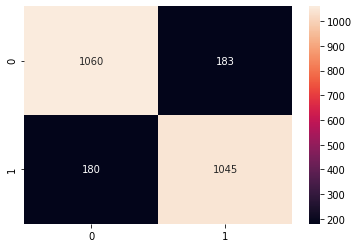

In [89]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf_test)
print(cm)
sns.heatmap(cm,annot=True,fmt='.0f')

***classification report of random forest***

In [90]:
report_random = classification_report(y_test, y_pred_rf_test)
print(report_random)

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      1243
         1.0       0.85      0.85      0.85      1225

    accuracy                           0.85      2468
   macro avg       0.85      0.85      0.85      2468
weighted avg       0.85      0.85      0.85      2468



***logistic regression***

In [91]:
from sklearn.linear_model import LogisticRegression
model_3_lr = LogisticRegression()
model_3_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

***predicting the train accuracy***

In [92]:
y_pred_lr_train = model_3_lr.predict(X_train)
print(accuracy_score(y_train,y_pred_lr_train))

0.7379298367488711


***predicting the test accuracy***

In [93]:
y_pred_lr_test = model_3_lr.predict(X_test)
print(accuracy_score(y_test,y_pred_lr_test))

0.752836304700162


***confusion matrix of logistic regression***

In [94]:
cm2 = confusion_matrix(y_test, y_pred_lr_test)
print(cm2)

[[929 314]
 [296 929]]


***classification report of logistic regression ***

In [95]:
report_lr = classification_report(y_test, y_pred_lr_test)
print(report_lr)

              precision    recall  f1-score   support

         0.0       0.76      0.75      0.75      1243
         1.0       0.75      0.76      0.75      1225

    accuracy                           0.75      2468
   macro avg       0.75      0.75      0.75      2468
weighted avg       0.75      0.75      0.75      2468



In [96]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rc = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rc, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [97]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 48.9min finished


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [98]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print('Model Performance')
    #print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [99]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Accuracy = 0.83%.


***K_NN classifier***

In [100]:
from sklearn.neighbors import KNeighborsClassifier
model_4_knn= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p =2)
model_4_knn.fit(X_train, y_train)
                                 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

***prediciting the train accuracy***

In [101]:
y_pred_knn_train = model_4_knn.predict(X_train)
print(accuracy_score(y_train,y_pred_knn_train))

0.8509899270580062


***testing accuracy***

In [102]:
y_pred_knn_test = model_4_knn.predict(X_test)
print(accuracy_score(y_test,y_pred_knn_test))

0.7771474878444085


***confusion matrix of K_NN ***

In [103]:
cm4 = confusion_matrix(y_test, y_pred_knn_test)
print(cm4)

[[980 263]
 [287 938]]


***classification report of KNN***

In [104]:
report_Knn = classification_report(y_test, y_pred_knn_test)
print(report_Knn)

              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78      1243
         1.0       0.78      0.77      0.77      1225

    accuracy                           0.78      2468
   macro avg       0.78      0.78      0.78      2468
weighted avg       0.78      0.78      0.78      2468



In [105]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [106]:
prediction = dc.predict(X_train)

In [107]:
print(accuracy_score(y_train,prediction))

1.0


In [108]:
test_prediction = dc.predict(X_test)
print(accuracy_score(y_test,test_prediction))

0.7824149108589952


***bagging classifier***

In [109]:
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
seed = 8
kfold = model_selection.KFold(n_splits = 3,
                       random_state = seed)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [110]:
base_cls = DecisionTreeClassifier()
num_trees = 500
model = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees,
                          random_state = seed)

In [111]:
results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold)
print("accuracy :")
print(results.mean())

accuracy :
0.8273706646980488


In [112]:
results_test = model_selection.cross_val_score(model, X_test, y_test, cv = kfold)
print("accuracy :")
print(results_test.mean())

accuracy :
0.78403492849041


***ADA boost classifie***r

In [113]:
from sklearn.ensemble import AdaBoostClassifier
boost1 = AdaBoostClassifier(random_state = 1,n_estimators=100,learning_rate=1.0)
boost1.fit(X_train,y_train)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=1)

***train accuracy***

In [114]:
pred = boost1.predict(X_train)
print(accuracy_score(y_train,pred))

0.7849947898575894


***test accuracy***

In [115]:
pred_test = boost1.predict(X_test)
print(accuracy_score(y_test,pred_test))

0.7726904376012966


***confusion matrix***

In [116]:
cm5 = confusion_matrix(y_test, pred_test)
print(cm5)

[[972 271]
 [290 935]]


***classification report***

In [117]:
report_ada = classification_report(y_test, pred_test)
print(report_ada)

              precision    recall  f1-score   support

         0.0       0.77      0.78      0.78      1243
         1.0       0.78      0.76      0.77      1225

    accuracy                           0.77      2468
   macro avg       0.77      0.77      0.77      2468
weighted avg       0.77      0.77      0.77      2468



***Gradient Boosting classifier***

In [118]:
from sklearn.ensemble import GradientBoostingClassifier
boost2 = GradientBoostingClassifier(n_estimators=100,max_depth=5)
boost2.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [119]:
predict_train = boost2.predict(X_train)
print('\nTarget on train data',predict_train)


Target on train data [0. 0. 1. ... 0. 0. 1.]


***train accuracy***

In [120]:
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)


accuracy_score on train dataset :  0.8878082667592915


In [121]:
predict_test = boost2.predict(X_test)
print('\nTarget on train data',predict_test)


Target on train data [1. 0. 1. ... 0. 1. 1.]


***test accuracy***

In [122]:
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on train dataset : ', accuracy_test)


accuracy_score on train dataset :  0.8144246353322528


***confusion matrix***

In [123]:
cm6 = confusion_matrix(y_test, predict_test)
print(cm6)

[[1011  232]
 [ 226  999]]


***classification report***

In [124]:
report_gd= classification_report(y_test, predict_test)
print(report_gd)

              precision    recall  f1-score   support

         0.0       0.82      0.81      0.82      1243
         1.0       0.81      0.82      0.81      1225

    accuracy                           0.81      2468
   macro avg       0.81      0.81      0.81      2468
weighted avg       0.81      0.81      0.81      2468



***ROC curve***

***ROC curve Random forest***

In [125]:
from sklearn.metrics import roc_auc_score, roc_curve


In [126]:
roc_model = model_2_rf.predict_proba(X_test)

In [127]:
roc_model = roc_model[:, 1]

In [128]:
roc_acc = roc_auc_score(y_test, roc_model)
print(roc_acc)

0.9273597451852825


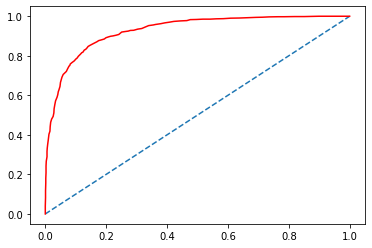

In [129]:
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,roc_model)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(false_positive_rate,true_positive_rate,color = 'red')
plt.show()

***ROC curve of KNN***

In [130]:
roc_model1 = model_4_knn.predict_proba(X_test)

In [131]:
roc_model1 = roc_model1[:, 1]

In [132]:
roc_acc_knn = roc_auc_score(y_test, roc_model1)
print(roc_acc_knn)

0.8511284417226262


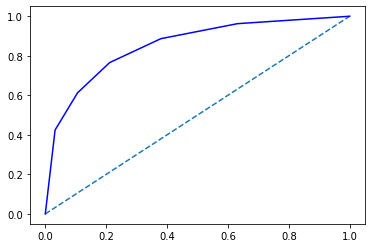

In [133]:
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,roc_model1)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(false_positive_rate,true_positive_rate,color = 'blue')
plt.show()